In [1]:
!pip install pandas seaborn
import pandas as pd
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df=pd.read_csv("diabetes.csv")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     Pedigree  Age  Outcome  
0       0.627   50        1  
1       0.351   31        0  
2       0.672   32        1  
3       0.167   21        0  
4       2.288   33        1  
..        ...  ...      ...  
763     0.171   63        0  
764     0.340   27        0  
765     0.245   30        0  
766     0.349   47        1  
767     0.315   23        0  

[768 rows x 9 columns]

In [4]:
 x=df.drop('Outcome',axis=1)
 y=df['Outcome']

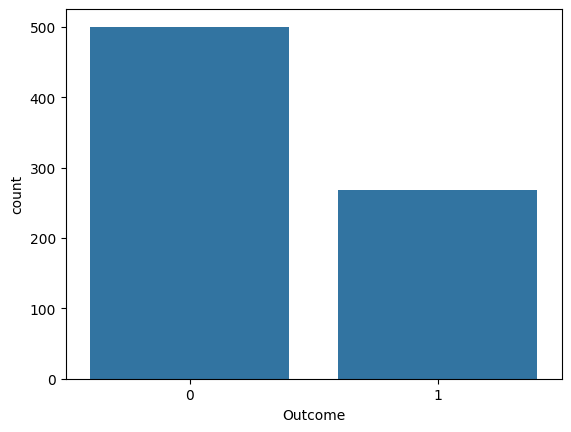

In [5]:
 sns.countplot(x=y);

In [6]:
 y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
!pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from sklearn.model_selection import train_test_split

# Assuming x_scaled and y are defined
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=42, test_size=0.3)


In [12]:
 x.shape

(768, 8)

In [13]:
 x_train.shape

(537, 8)

In [14]:
x_test.shape

(231, 8)

In [15]:
 from sklearn.neighbors import KNeighborsClassifier

In [18]:
 knn = KNeighborsClassifier(n_neighbors = 5)

In [19]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [20]:
 from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay
 from sklearn.metrics import classification_report

In [22]:
 y_pred = knn.predict(x_test)

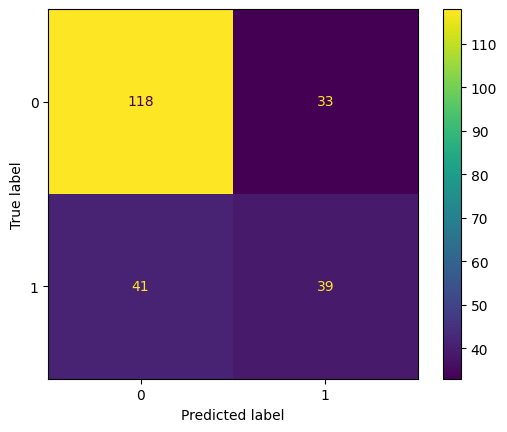

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       151
           1       0.54      0.49      0.51        80

    accuracy                           0.68       231
   macro avg       0.64      0.63      0.64       231
weighted avg       0.67      0.68      0.68       231



In [25]:
 import matplotlib.pyplot as plt
 import numpy as np

In [26]:
 error = []
 for k in range (1,41):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error.append(np.mean(pred!=y_test))

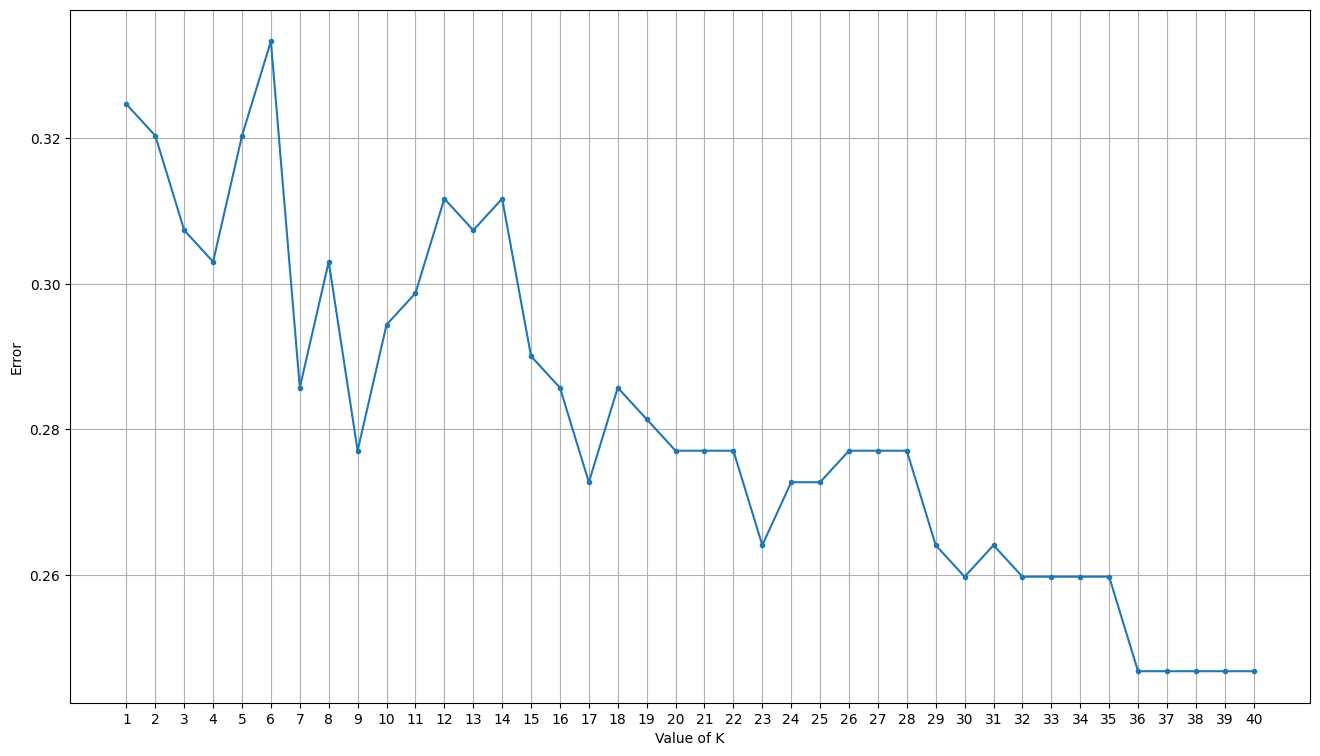

In [27]:
 plt.figure(figsize=(16,9))
 plt.xlabel('Value of K')
 plt.ylabel('Error')
 plt.grid()
 plt.xticks(range(1,41))
 plt.plot(range(1,41),error,marker='.')

In [28]:
knn = KNeighborsClassifier(n_neighbors = 33) 

In [29]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=33)

In [30]:
y_pred=knn.predict(x_test)

In [31]:
 print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.81       151
           1       0.67      0.50      0.57        80

    accuracy                           0.74       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.73      0.74      0.73       231

